# Abalone

#### Interest.
The purpose of this project is to predict the age of abalone by several measurements. The age of abalone is counted by Ring.
#### Source
An Abalone dataset is available in the UCI Machine Learning Repository website below:
https://archive.ics.uci.edu/ml/datasets/Abalone

## 1. Data preprocessing

### 1.1 Import Dataset

In [531]:
abalone = pd.read_csv("abalone.data", sep = ',',
                    names=["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"])

In [532]:
abalone.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In the 'Sex' column, we notice that 'I' represents infant, which does not satisfy the meaning of Sex. So I try to divide the dataset as adult group and infant group, and investigate any difference in the two group.

In [533]:
abalone_infant = abalone[abalone['Sex'] == 'I']
abalone_adult = abalone[abalone['Sex'] != 'I']

### 1.2 Data visualization and cleaning

In [534]:
abalone_infant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 4 to 4166
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             1342 non-null   object 
 1   Length          1342 non-null   float64
 2   Diameter        1342 non-null   float64
 3   Height          1342 non-null   float64
 4   Whole weight    1342 non-null   float64
 5   Shucked weight  1342 non-null   float64
 6   Viscera weight  1342 non-null   float64
 7   Shell weight    1342 non-null   float64
 8   Rings           1342 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 104.8+ KB


In [535]:
abalone_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2835 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             2835 non-null   object 
 1   Length          2835 non-null   float64
 2   Diameter        2835 non-null   float64
 3   Height          2835 non-null   float64
 4   Whole weight    2835 non-null   float64
 5   Shucked weight  2835 non-null   float64
 6   Viscera weight  2835 non-null   float64
 7   Shell weight    2835 non-null   float64
 8   Rings           2835 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 221.5+ KB


From the info list, we can find 8 numeric variables to describe the abalone. Among them, four variables are associated with 'weights', the rest of them are 'Length', 'Diameter', 'Height', which I put them into 'growth', and the response group 'Rings'. Now plot some distributions to investigate which variable has the similar distribution to 'Rings', and decide whether we need to remove the unnecessary columns. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

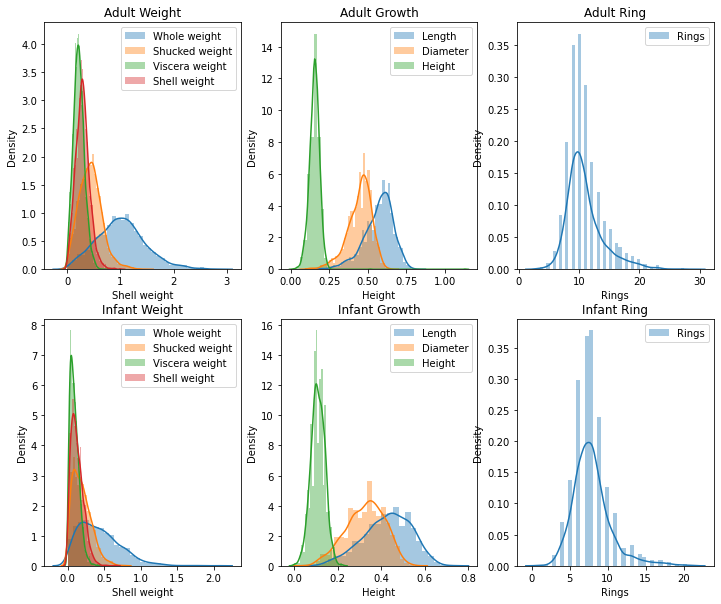

In [536]:
import seaborn as sns
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

# adults weights
sns.distplot(abalone_adult['Whole weight'], label = 'Whole weight', ax = ax1)
sns.distplot(abalone_adult['Shucked weight'], label = 'Shucked weight', ax = ax1)
sns.distplot(abalone_adult['Viscera weight'], label = 'Viscera weight', ax = ax1)
sns.distplot(abalone_adult['Shell weight'], label = 'Shell weight', ax = ax1)
ax1.set_title('Adult Weight')
ax1.legend()

# adults growth
sns.distplot(abalone_adult['Length'], label = 'Length', ax = ax2)
sns.distplot(abalone_adult['Diameter'], label = 'Diameter', ax = ax2)
sns.distplot(abalone_adult['Height'], label = 'Height', ax = ax2)
ax2.set_title('Adult Growth')
ax2.legend()

# adults Rings
sns.distplot(abalone_adult['Rings'], label = 'Rings', ax = ax3)
ax3.set_title('Adult Ring')
ax3.legend()

# Infant weights
sns.distplot(abalone_infant['Whole weight'], label = 'Whole weight', ax = ax4)
sns.distplot(abalone_infant['Shucked weight'], label = 'Shucked weight', ax = ax4)
sns.distplot(abalone_infant['Viscera weight'], label = 'Viscera weight', ax = ax4)
sns.distplot(abalone_infant['Shell weight'], label = 'Shell weight', ax = ax4)
ax4.set_title('Infant Weight')
ax4.legend()

# Infant Growth
sns.distplot(abalone_infant['Length'], label = 'Length', ax = ax5)
sns.distplot(abalone_infant['Diameter'], label = 'Diameter', ax = ax5)
sns.distplot(abalone_infant['Height'], label = 'Height', ax = ax5)
ax5.set_title('Infant Growth')
ax5.legend()

# adults Rings
sns.distplot(abalone_infant['Rings'], label = 'Rings', ax = ax6)
ax6.set_title('Infant Ring')
ax6.legend()

#### Weights:
Compared to the distribution of Rings, Shucked weight, Viscera weight and Shell weight are similar to it, while the Whole weight's variance is too large, which might not be correlated to the Rings.

#### Growth:
The three distributions seem to be similar to Rings.

#### Conclusion:
The Whole weight column can be removed here.

Then let's see if different sex of adult abalone differs the distribution.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

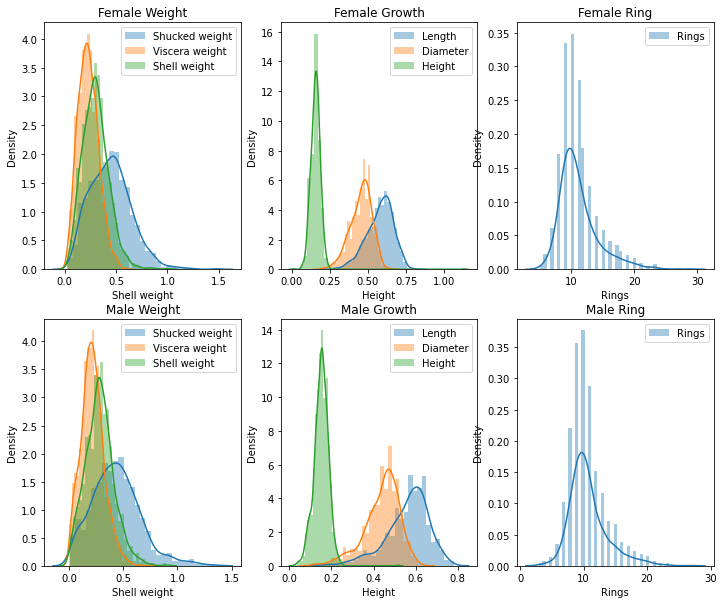

In [537]:
abalone_adult_m = abalone_adult[abalone_adult['Sex']=='M']
abalone_adult_f = abalone_adult[abalone_adult['Sex']=='F']

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

# female weights
sns.distplot(abalone_adult_f['Shucked weight'], label = 'Shucked weight', ax = ax1)
sns.distplot(abalone_adult_f['Viscera weight'], label = 'Viscera weight', ax = ax1)
sns.distplot(abalone_adult_f['Shell weight'], label = 'Shell weight', ax = ax1)
ax1.set_title('Female Weight')
ax1.legend()

# female growth
sns.distplot(abalone_adult_f['Length'], label = 'Length', ax = ax2)
sns.distplot(abalone_adult_f['Diameter'], label = 'Diameter', ax = ax2)
sns.distplot(abalone_adult_f['Height'], label = 'Height', ax = ax2)
ax2.set_title('Female Growth')
ax2.legend()

# female Rings
sns.distplot(abalone_adult_f['Rings'], label = 'Rings', ax = ax3)
ax3.set_title('Female Ring')
ax3.legend()

# male weights
sns.distplot(abalone_adult_m['Shucked weight'], label = 'Shucked weight', ax = ax4)
sns.distplot(abalone_adult_m['Viscera weight'], label = 'Viscera weight', ax = ax4)
sns.distplot(abalone_adult_m['Shell weight'], label = 'Shell weight', ax = ax4)
ax4.set_title('Male Weight')
ax4.legend()

# male Growth
sns.distplot(abalone_adult_m['Length'], label = 'Length', ax = ax5)
sns.distplot(abalone_adult_m['Diameter'], label = 'Diameter', ax = ax5)
sns.distplot(abalone_adult_m['Height'], label = 'Height', ax = ax5)
ax5.set_title('Male Growth')
ax5.legend()

# male Rings
sns.distplot(abalone_adult_m['Rings'], label = 'Rings', ax = ax6)
ax6.set_title('Male Ring')
ax6.legend()

#### Conclusion
There looks like no obvious difference on distribution between Female and male abalone. So I decide to convert 'Sex' into 'Adult', which consists of 'A' and 'I' only, representing adults and infants.

In [538]:
abalone_df = abalone.replace(dict.fromkeys(['M','F'], 'A'))
abalone_df= abalone_df.drop('Whole weight',axis=1)
abalone_df.rename(columns = {'Sex':'Age'}, inplace = True)

In [539]:
abalone_df

,Age,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,A,0.455,0.365,0.095,0.2245,0.1010,0.1500,15
1,A,0.350,0.265,0.090,0.0995,0.0485,0.0700,7
2,A,0.530,0.420,0.135,0.2565,0.1415,0.2100,9
3,A,0.440,0.365,0.125,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,A,0.565,0.450,0.165,0.3700,0.2390,0.2490,11
4173,A,0.590,0.440,0.135,0.4390,0.2145,0.2605,10
4174,A,0.600,0.475,0.205,0.5255,0.2875,0.3080,9
4175,A,0.625,0.485,0.150,0.5310,0.2610,0.2960,10


### 1.3 Split dataset

In [540]:
# Predictors and Response dataset
y = abalone_df['Rings']
X = abalone_df.loc[:, abalone_df.columns != 'Rings']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

In [541]:
X_train

,Age,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight
1815,A,0.665,0.515,0.185,0.5595,0.2930,0.4375
1128,A,0.560,0.440,0.155,0.3360,0.1765,0.2450
790,A,0.570,0.465,0.160,0.3145,0.2575,0.2630
3154,A,0.540,0.410,0.130,0.2375,0.1065,0.1750
2647,I,0.500,0.390,0.125,0.2940,0.1320,0.1605
...,...,...,...,...,...,...,...
3444,A,0.490,0.400,0.115,0.2560,0.1325,0.1450
466,A,0.670,0.550,0.190,0.5425,0.3035,0.4000
3092,A,0.510,0.395,0.125,0.2440,0.1335,0.1880
3772,A,0.575,0.465,0.120,0.5160,0.2185,0.2350


### 1.4 Data Scaling

In [542]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Numerical columns and Categorical columns split
# Numeric features name
X_num = list(X_train.drop('Age',axis=1))
# Categorical feature name
X_cat = ['Age']

# Pipeline for numerical scaling columns
CTF = ColumnTransformer(
    [('numerical',MinMaxScaler(),X_num),
    ('categorical',OneHotEncoder(handle_unknown='ignore'),X_cat)]
)

# Fit and transform
X_train = CTF.fit_transform(X_train)
X_test = CTF.transform(X_test)


In [543]:
print(len(X_train),len(X_test))
X_train

3550 627


array([[0.7972973 , 0.77310924, 0.16371681, ..., 0.43447932, 1.        ,
        0.        ],
       [0.65540541, 0.64705882, 0.13716814, ..., 0.24265072, 1.        ,
        0.        ],
       [0.66891892, 0.68907563, 0.14159292, ..., 0.26058794, 1.        ,
        0.        ],
       ...,
       [0.58783784, 0.57142857, 0.11061947, ..., 0.18584953, 1.        ,
        0.        ],
       [0.67567568, 0.68907563, 0.10619469, ..., 0.2326856 , 1.        ,
        0.        ],
       [0.7027027 , 0.70588235, 0.14159292, ..., 0.26856004, 1.        ,
        0.        ]])

The first 6 columns of array represent 6 numerical features, the last 2 columns [1,0] and [0,1] represents 'A' (Adults) and 'I' (Infants), respectively.

## 2. Model Creating

### 2.1 Random Forest Regressor

In [563]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# HyperParameters setting
Param_Grid = {
        "max_depth":[None,5,8], 
        "min_samples_leaf":[1,2,3], 
        'max_features':["auto", "sqrt", "log2"],
        "bootstrap": [True, False]
            }
Rf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=500)
Rf_random = RandomizedSearchCV(estimator = Rf, param_distributions = Param_Grid, n_iter = 50, cv = 3, verbose=2, random_state=0, n_jobs = -1)

Rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=2,
                                                   n_estimators=500,
                                                   random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3]},
                   random_state=0, verbose=2)

In [564]:
Rf_random.best_params_

{'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': True}

### 2.2 Evaluation

In [565]:
from sklearn.metrics import accuracy_score

prediction = Rf_random.predict(X_test)
# Round predicted results to nearest integer (1.5 and 2.5 round to 2.0, -0.5 and 0.5 round to 0.0)
prediction = np.rint(prediction)
# Test error
accuracy = accuracy_score(y_test,prediction)
accuracy

0.24401913875598086

#### RMSE estimator

In [566]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(rmse)

2.195035721390843


After rounding to integer, the RMSE of predictions on test set is 2.1950.

### 2.3  Model improvement using feature importances

Now we use the best parameters so far to build the regressor again.

In [567]:
Rf = RandomForestRegressor(min_samples_leaf= 3,
                             max_features= 'log2',
                             max_depth= None,
                             bootstrap= True,
                             n_estimators= 500,
                           random_state=0
                             )
Rf.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', min_samples_leaf=3, n_estimators=500,
                      random_state=0)

In [568]:
import time

start_time = time.time()
importances = Rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.080 seconds


Plot the feature importance distribution.

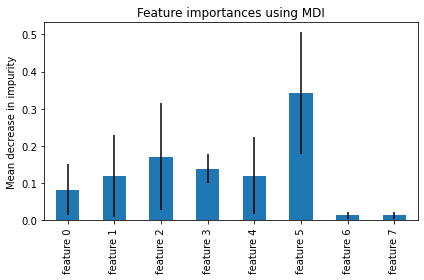

In [569]:
feature_names = feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Remove feature with importance lower than 5%

In [570]:
forest_importances

feature 0    0.082448
feature 1    0.119335
feature 2    0.171108
feature 3    0.138518
feature 4    0.119681
feature 5    0.342412
feature 6    0.013202
feature 7    0.013296
dtype: float64

As we can see from the results, feature 6 and 7 are lower than 0.05, which correspond to feature 'Age' ('Sex'). Remove the categorical feature and calculate the total feature importance.

In [571]:
sum = 0
# The features except the last two categorical columns
for i in forest_importances[:6]:
    sum+=i
print("the total feature importance is: ", sum)

the total feature importance is:  0.9735013873551921


In [572]:
print(X_train)

[[0.7972973  0.77310924 0.16371681 ... 0.43447932 1.         0.        ]
 [0.65540541 0.64705882 0.13716814 ... 0.24265072 1.         0.        ]
 [0.66891892 0.68907563 0.14159292 ... 0.26058794 1.         0.        ]
 ...
 [0.58783784 0.57142857 0.11061947 ... 0.18584953 1.         0.        ]
 [0.67567568 0.68907563 0.10619469 ... 0.2326856  1.         0.        ]
 [0.7027027  0.70588235 0.14159292 ... 0.26856004 1.         0.        ]]


#### Train the model with remaining features.

In [573]:
X_train_1 = np.delete(X_train,6,1)
X_train_1 = np.delete(X_train_1,6,1)
X_test_1 = np.delete(X_test,6,1)
X_test_1 = np.delete(X_test_1,6,1)
Rf.fit(X_train_1, y_train)

RandomForestRegressor(max_features='log2', min_samples_leaf=3, n_estimators=500,
                      random_state=0)

Elapsed time to compute the importances: 0.056 seconds
RMSE is:  2.233570174782478


0.23763955342902712

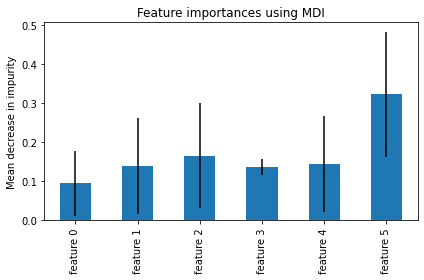

In [574]:
start_time = time.time()
importances = Rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
feature_names = feature_names = [f"feature {i}" for i in range(X_train_1.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Calculate the RMSE
prediction = Rf.predict(X_test_1)
prediction = np.rint(prediction)
rmse = (mean_squared_error(y_test, prediction))**.5
print("RMSE is: ",rmse)

accuracy_1 = accuracy_score(y_test,prediction)
accuracy_1

The RMSE increases from 2.1950 to 2.2336, which performs worse.

### 3 Performance Evaluation

#### Prediction error

- The test error (accuracy) of first and second Random Forest regressor is 0.24402 and 0.2376, respectively, with slightly different. It indicates that of all the prediction, only 24% are the same as the true Ring value.
- In the second model, the RMSE = 2.234, which indicates for each ring value, the prediction has 2.233 average error from the accurate Ring value.

Text(0, 0.5, 'Frequency')

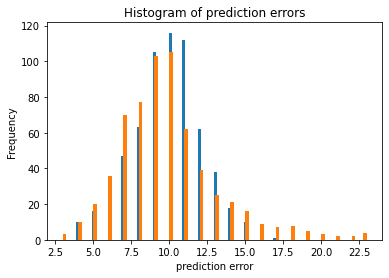

In [575]:
# Histogram of prediciton and True label
plt.hist(prediction,bins = 80)
plt.hist(y_test,bins = 80)
plt.title('Histogram of prediction errors')
plt.xlabel('prediction error')
plt.ylabel('Frequency')

From the distribution, Ring value range from 7.5 to 15 tend to have average errors.

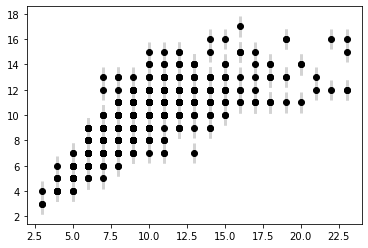

In [576]:
dy = 0.8

plt.errorbar(y_test, prediction, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

From the error bar plot, x_axis shows the truth Ring values, y_axis shows the predicted value. It's more obvious to see the average errors happen in the range of 7.5 to 17.5.

### 4. SVM Regressor

In [577]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
# Train with full dimensional training set
Regr = BaggingRegressor(base_estimator=SVR(C=1.0, epsilon=0.2, kernel= 'linear'),
                             bootstrap= True,
                             max_samples=3,
                             n_estimators= 500).fit(X_train, y_train)


In [578]:
# Calculate the RMSE
prediction_SVM = Regr.predict(X_test)
prediction_SVM = np.rint(prediction_SVM)
rmse = (mean_squared_error(y_test, prediction_SVM))**.5
print("SVM's RMSE is: ",rmse)
accuracy_SVM = accuracy_score(y_test, prediction_SVM)
print("SVM's accuracy is: ", accuracy_SVM)

SVM's RMSE is:  3.12626369983294
SVM's accuracy is:  0.17543859649122806


#### Plots of predicted values and truth value

Text(0, 0.5, 'Frequency')

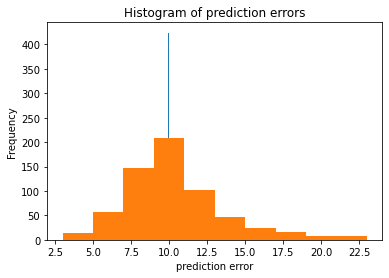

In [579]:
# Histogram of prediciton and True label

plt.hist(prediction_SVM,bins = 10)
plt.hist(y_test,bins = 10)
plt.title('Histogram of prediction errors')
plt.xlabel('prediction error')
plt.ylabel('Frequency')

As we can see from the plot, the prediction of SVM centralize on [9,10].

#### Error bar plot

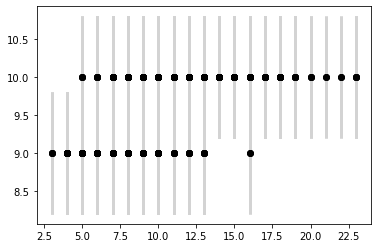

In [580]:
# Error bar plot
dy = 0.8
plt.errorbar(y_test, prediction_SVM, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

From the error bar plot we can obviously see the predicted Ring value are mostly 9 and 10.

#### Compare Random Forest Regressor and Bagging SVM regressor

Compared to Random Forest regressors, the RMSE and prediction accuracy (test error) performance become worse (accuracy: 0.2440 to 0.175, RMSE: 2.195 to 3.126).